In [4]:
import numpy as np
import matplotlib.pyplot as plt

x_t_func = lambda x_t_1, eps: 2*x_t_1/(1+0.8*x_t_1**2) + eps
x_0 = np.random.uniform(-1,1)
all_x = [x_0]

np.random.seed(0)
for i in range(10000):
    u = np.random.uniform(-1,1)
    all_x.append(x_t_func(all_x[-1], u))
all_x = np.array(all_x, ndmin=2).T

In [18]:
def standarize(exog):
    norm_exog = np.zeros((1,exog.shape[1]-1))
    mean_st = []
    std_st = []
    for i in range(2,exog.shape[1]):
        norm_exog[0,i-2] = (exog[0,i-1] - exog[0,:i].mean())/exog[0,:i].std()
        mean_st.append(exog[0,:i].mean())
        std_st.append(exog[0,:i].std())
    
    return norm_exog.T,mean_st,std_st


norm_exog,mean_st,std_st =  standarize(all_x.T)

In [21]:
norm_exog

array([[ 1.        ],
       [ 1.28662854],
       [ 0.55531267],
       ...,
       [-0.43944745],
       [-1.63345374],
       [ 0.        ]])

In [24]:
lag_matrix = lambda x,lag: np.array([[x[j+i, 0] for j in range(lag)] for i in range(x.shape[0]-lag)])
lags = 7
all_x_lag_m = lag_matrix(norm_exog, lags)
target_t_0 = norm_exog[lags:]

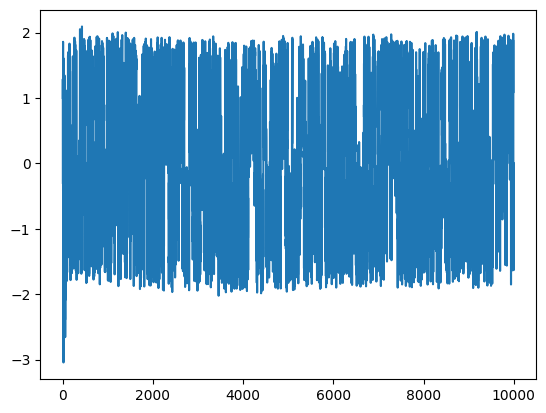

In [26]:
plt.plot(norm_exog)

In [27]:
import pandas as pd
df_target = pd.DataFrame(target_t_0)
df_all_x = pd.DataFrame(all_x_lag_m)
df_all_x.columns = ["lag_" + str(i) for i in range(lags, 0, -1)]
df_target.columns = ["Target"]

In [28]:
df_target.to_csv("../../data/target_non_linear_ts.csv", index=False)
df_all_x.to_csv("../../data/non_linear_ts_lags.csv", index=False)